### Audio Classification Of Environmental Sounds Which We Listen in Daily Life

###### KNN,ANN,CNN MODELS ARE USED FOR CLASSIFICATION

In [929]:
!pip install librosa

In [930]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Audio Load and Pre Process

In [931]:
filename="Audio/Horn/Horn2.wav";

In [932]:
import IPython.display as ipd
import librosa 
import librosa.display
import numpy as np

In [933]:
def plotAudioWave(filename):   
    plt.figure(figsize=(14,5))
    data,sample_rate=librosa.load(filename)
    librosa.display.waveplot(data,sr=sample_rate)
    #plt.plot(data)
    ipd.Audio(filename)
    return sample_rate

In [934]:
#Measuring Decibel
S = np.abs(librosa.stft(data))
data,sample_rate=librosa.load(filename)
librosa.amplitude_to_db(S**2).max()

85.30351

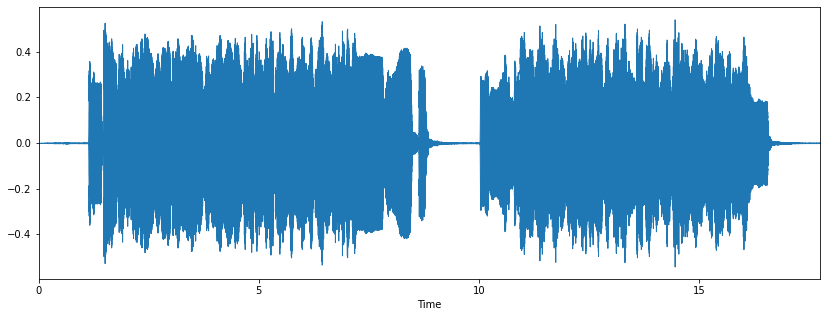

In [935]:
sample_rate=plotAudioWave(filename)


#### Key Feature :MFCC
MFCC Stands for Mel Frequency Cepstral Co-efficients which are the coefficients that collectively make up an MFC. MFC is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

In [936]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfccs

array([[-5.7868256e+02, -5.7836542e+02, -5.7590424e+02, ...,
        -5.5084143e+02, -5.4973157e+02, -5.5195844e+02],
       [ 0.0000000e+00,  4.4766897e-01,  3.7742496e+00, ...,
         3.2581837e+01,  3.2998184e+01,  2.8778006e+01],
       [ 0.0000000e+00,  4.4514000e-01,  3.3982792e+00, ...,
         1.8310886e+01,  1.7199543e+01,  1.1793016e+01],
       ...,
       [ 0.0000000e+00, -2.8876662e-01, -1.4756200e+00, ...,
         1.7069721e+00,  3.5888407e+00,  1.7702835e+00],
       [ 0.0000000e+00, -3.0926770e-01, -1.6708865e+00, ...,
         1.7180979e-02,  1.3266728e+00, -9.6872729e-01],
       [ 0.0000000e+00, -3.2860479e-01, -1.9702470e+00, ...,
        -3.1502223e+00, -2.0502400e+00, -2.0809445e+00]], dtype=float32)

### 1. Audio Analysis on ANN

#### Data Pre Processing for All Audio Files

In [937]:
import pandas as pd
import os
import librosa
from tqdm import tqdm
import numpy as np

In [1003]:
audio_dataset_path='Audio/'
csv_data=pd.read_csv('Audio_Dataset(New).csv')
num_of_classes=6

In [1256]:
def extract_features(file):
    audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [1257]:
    extracted_features=[]
    for index_num,row in tqdm(csv_data.iterrows()):
        filename=os.path.join(os.path.abspath(audio_dataset_path),str(row["folder"]),str(row["filename"]))
        class_name=row["class"]
        data=extract_features(filename)
        extracted_features.append([data,class_name])

119it [01:08,  1.75it/s]


#### Putting Extracted Feature to Dataframe to Create Train dataset

In [1258]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-458.6312, 84.121346, -79.89857, 29.059214, 3...",bird-chirp
1,"[-437.791, -192.74236, -88.79139, 127.660904, ...",bird-chirp
2,"[-573.88745, -25.46725, 12.589169, 73.12821, -...",bird-chirp
3,"[-175.46107, 10.8919935, -37.204163, 53.11137,...",bird-chirp
4,"[-540.08234, -57.422127, 1.0332566, 59.75111, ...",bird-chirp


In [1259]:
x=np.array(extracted_features_df['feature'].tolist())

In [1260]:
y=np.array(extracted_features_df['class'].tolist())
y

array(['bird-chirp', 'bird-chirp', 'bird-chirp', 'bird-chirp',
       'bird-chirp', 'bird-chirp', 'bird-chirp', 'bird-chirp',
       'bird-chirp', 'bird-chirp', 'bird-chirp', 'bird-chirp',
       'bird-chirp', 'bird-chirp', 'bird-chirp', 'bird-chirp',
       'bird-chirp', 'bird-chirp', 'bird-chirp', 'bird-chirp',
       'bird-chirp', 'Children Playing', 'Children Playing',
       'Children Playing', 'Children Playing', 'Children Playing',
       'Children Playing', 'Children Playing', 'Children Playing',
       'Children Playing', 'Children Playing', 'Children Playing',
       'Children Playing', 'Children Playing', 'Children Playing',
       'Children Playing', 'Children Playing', 'Children Playing',
       'Children Playing', 'Children Playing', 'Children Playing',
       'Car-Horn', 'Car-Horn', 'Car-Horn', 'Car-Horn', 'Car-Horn',
       'Car-Horn', 'Car-Horn', 'Car-Horn', 'Car-Horn', 'Car-Horn',
       'Car-Horn', 'Car-Horn', 'Car-Horn', 'Car-Horn', 'Car-Horn',
       'Car-Horn', 'C

#### Label Encoding Classes

In [1261]:
!pip install --upgrade tensorflow
!pip install tensorflow-addons
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()
y=to_categorical(labelEncoder.fit_transform(y))

Requirement already up-to-date: tensorflow in c:\programdata\anaconda3\lib\site-packages (2.6.0)


#### Spliting Train Test

In [1342]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_Test=train_test_split(x,y,test_size=0.3,random_state=0)

#### Creating ANN Model

In [1343]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from sklearn import metrics

In [1344]:
num_labels=y.shape[1]


In [1345]:
model1=Sequential()
#first layer
model1.add(Dense(100,input_shape=(40,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

#second layer
model1.add(Dense(200))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

#third layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

#final layer
model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

In [1346]:
model1.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 100)               4100      
_________________________________________________________________
activation_300 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_192 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_171 (Dense)            (None, 200)               20200     
_________________________________________________________________
activation_301 (Activation)  (None, 200)               0         
_________________________________________________________________
dropout_193 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_172 (Dense)            (None, 100)             

In [1347]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#### Training ANN Model

In [1359]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('saved-models/audio-classification', verbose=1, save_best_only=True)

model1.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_test,Y_Test),callbacks=[checkpointer])

Epoch 1/100
3/3 [==============================] - 0s 30ms/step - loss: 1.4505 - accuracy: 0.3253 - val_loss: 1.5874 - val_accuracy: 0.3333

Epoch 00001: val_loss improved from inf to 1.58741, saving model to saved-models\audio-classification
INFO:tensorflow:Assets written to: saved-models\audio-classification\assets
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.4955 - accuracy: 0.4217 - val_loss: 1.5843 - val_accuracy: 0.3333

Epoch 00002: val_loss improved from 1.58741 to 1.58431, saving model to saved-models\audio-classification
INFO:tensorflow:Assets written to: saved-models\audio-classification\assets
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 1.5133 - accuracy: 0.4217 - val_loss: 1.5845 - val_accuracy: 0.3333

Epoch 00003: val_loss did not improve from 1.58431
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 1.5942 - accuracy: 0.3614 - val_loss: 1.5849 - val_accuracy: 0.3333

Epoch 00004: val_loss did

#### Accuracy Of ANN Model

In [1360]:
test_accuracy=model1.evaluate(X_test,Y_Test,verbose=0)
print(test_accuracy[1])

0.4722222089767456


#### Prediction Of The ANN Model

In [1361]:
filename="Audio/Dog Bark/DogBark5.wav"
prediction_feature=extract_features(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict_x=model1.predict(prediction_feature)
classes_x=np.argmax(predict_x,axis=1)
predicted_class=labelEncoder.inverse_transform(classes_x)
predicted_class

array(['Dog-Bark'], dtype='<U16')

In [1354]:
iterate=2
for value in x:
    for value2 in X_test:
        if np.array_equal(value,value2):
           print(iterate)
    iterate+=1           

4
5
9
10
12
15
18
24
26
28
32
35
45
47
50
52
53
56
61
62
63
65
70
76
78
91
93
95
96
97
98
99
109
112
113
115
120


### 2. Audio Analysis on KNN

#### Preprocessing Data For KNN Model

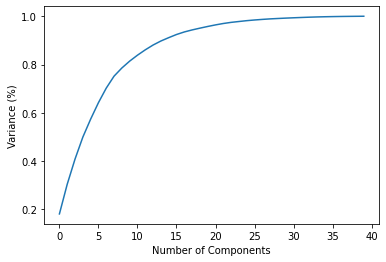

In [957]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

pca = PCA().fit(x_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()


#### Creating GridSearch CV and KNN Model 

Gridsearch CV is used here to find suitable hyperparameter like number of neighbours etc to find best accuracy

In [958]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model2 = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model2.fit(x_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']})

#### Model Score and Best Parameter

In [959]:
print(f'Model Score: {model2.score(x_test_scaled, Y_Test)}')
model2.best_params_

Model Score: 0.5833333333333334


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

#### Model Prediction

In [960]:
filename="Audio/Dog Bark/DogBark5.wav"
prediction_feature=extract_features(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)
classes_x=np.argmax(predict_x,axis=1)
predicted_class=labelEncoder.inverse_transform(classes_x)
predicted_class

array(['Children Playing'], dtype='<U16')

### 3. Audio Analysis on CNN

In [1167]:
#declaring spectrogram path
spectogram_path='Audio/Spectrogram'

#### Audio Pre Processing
create_spectrogram is a Function to Create Spectograms from Audio Data. This function will also randomly select spectogram for test train split and put them to seperate folder.

In [1168]:
from random import randrange
    
numberofrows=len(csv_data.axes[0])
test_split=0.2
test_split_count=0    
classlist={}
class_count=0
def create_spectrogram(filename,name,classname):
    global test_split_count
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    random=0
    test_path=spectogram_path+'/Test Data/'+ classname
    train_path=spectogram_path+'/Train Data/'+ classname
    temp_path=''
   
    if((test_split_count/numberofrows)*100<20):
        random=randrange(2)
        i=1
        if(classname == "predict"):
            random=1
        if(classlist.get(classname)==None):            
            classlist[classname]=i
        else :
            i=int(classlist[classname])
            i+=1
            classlist[classname]=i
        if(i>5):
            random=0
       
    if(random):
        test_split_count +=1
        temp_path=test_path   
        print(random,temp_path)
    else:
         temp_path=train_path
        
    if not os.path.exists(temp_path):
           os.mkdir(temp_path)
    filename  = temp_path+'/'+name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del name,clip,sample_rate,fig,ax,S
    return filename

Making directories if not exist and Creating Spectrogram for all audio

In [1169]:
    import shutil
    if os.path.exists(spectogram_path+'/Test Data'):
        shutil.rmtree(spectogram_path+'/Test Data')
    if os.path.exists(spectogram_path+'/Train Data'):
        shutil.rmtree(spectogram_path+'/Train Data')
    os.mkdir(spectogram_path+'/Test Data')
    os.mkdir(spectogram_path+'/Train Data')
    extracted_features=[]
    for index_num,row in tqdm(csv_data.iterrows()):
        filename=os.path.join(os.path.abspath(audio_dataset_path),str(row["folder"]),str(row["filename"]))
        class_name=row["class"]
        create_spectrogram(filename,str(row["filename"]),class_name)
     

3it [00:00,  8.23it/s]

1 Audio/Spectrogram/Test Data/bird-chirp
1 Audio/Spectrogram/Test Data/bird-chirp


23it [00:10,  5.21it/s]

1 Audio/Spectrogram/Test Data/Children Playing


25it [00:19,  2.21s/it]

1 Audio/Spectrogram/Test Data/Children Playing


42it [00:29,  7.14it/s]

1 Audio/Spectrogram/Test Data/Car-Horn


45it [00:30,  6.36it/s]

1 Audio/Spectrogram/Test Data/Car-Horn
1 Audio/Spectrogram/Test Data/Car-Horn


62it [00:33,  9.32it/s]

1 Audio/Spectrogram/Test Data/Dog-Bark
1 Audio/Spectrogram/Test Data/Dog-Bark


64it [00:33,  9.29it/s]

1 Audio/Spectrogram/Test Data/Dog-Bark


82it [00:39,  5.63it/s]

1 Audio/Spectrogram/Test Data/Thunder


84it [00:40,  2.92it/s]

1 Audio/Spectrogram/Test Data/Thunder


86it [00:41,  1.99it/s]

1 Audio/Spectrogram/Test Data/Thunder


104it [00:47,  2.77it/s]

1 Audio/Spectrogram/Test Data/Cricket-Chirp


105it [00:48,  2.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
106it [00:50,  1.01it/s]

1 Audio/Spectrogram/Test Data/Cricket-Chirp


119it [01:07,  1.76it/s]


#### Creating Test Train Dataset

In [1170]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [1171]:
train_dataset=train.flow_from_directory(spectogram_path+'/Train Data' ,target_size=(200,200),batch_size=3,class_mode='binary')

validation_dataset=validation.flow_from_directory(spectogram_path+'/Test Data',target_size=(200,200),batch_size=3,class_mode='binary',shuffle=False)

Found 104 images belonging to 6 classes.
Found 15 images belonging to 6 classes.


#### Creating A CNN MODEL

In [1172]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [1173]:
model3 = models.Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(200,200,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(128, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 200, 200, 32)      896       
_________________________________________________________________
activation_253 (Activation)  (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 198, 198, 64)      18496     
_________________________________________________________________
activation_254 (Activation)  (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
dropout_158 (Dropout)        (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 99, 99, 64)      

In [1174]:
import tensorflow as tf
optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.0003, decay=1e-6)
model3.compile(optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [1175]:
checkpoint = ModelCheckpoint('saved-models/audio-classification-cnn', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### CNN Model Training

In [1176]:
model_fit=model3.fit(train_dataset,steps_per_epoch=5,epochs=100,validation_data=validation_dataset)

Epoch 1/100
5/5 [==============================] - 5s 946ms/step - loss: 3.2835 - accuracy: 0.4000 - val_loss: 2.2576 - val_accuracy: 0.1333
Epoch 2/100
5/5 [==============================] - 5s 926ms/step - loss: 2.1455 - accuracy: 0.2667 - val_loss: 2.2210 - val_accuracy: 0.2667
Epoch 3/100
5/5 [==============================] - 5s 934ms/step - loss: 2.1701 - accuracy: 0.0667 - val_loss: 2.1552 - val_accuracy: 0.2667
Epoch 4/100
5/5 [==============================] - 4s 926ms/step - loss: 1.5178 - accuracy: 0.5333 - val_loss: 2.0875 - val_accuracy: 0.3333
Epoch 5/100
5/5 [==============================] - 4s 910ms/step - loss: 2.5225 - accuracy: 0.1333 - val_loss: 2.2286 - val_accuracy: 0.2667
Epoch 6/100
5/5 [==============================] - 5s 957ms/step - loss: 2.0829 - accuracy: 0.3333 - val_loss: 2.1731 - val_accuracy: 0.2667
Epoch 7/100
5/5 [==============================] - 4s 935ms/step - loss: 1.5597 - accuracy: 0.4667 - val_loss: 1.9665 - val_accuracy: 0.2667
Epoch 8/100
5

#### CNN Model Accuracy

In [1177]:
test_accuracy=model3.evaluate(validation_dataset)
print(test_accuracy[1])

5/5 [==============================] - 1s 111ms/step - loss: 0.1602 - accuracy: 0.9333
0.9333333373069763


#### CNN Model Prediction

In [1206]:
from keras.preprocessing import image
filename="Audio/Dog Bark/DogBark1.wav"
feature_spectogram_path=create_spectrogram(filename,'Dogbark4','predict')
spectogram=image.load_img(feature_spectogram_path,target_size=(200,200))
prediction_feature=image.img_to_array(spectogram)
prediction_feature=np.expand_dims(prediction_feature,axis=0)
prediction_feature=np.vstack([prediction_feature])
predict_x=model3.predict(prediction_feature)
classes_x=np.argmax(predict_x,axis=1)
predicted_class=labelEncoder.inverse_transform(classes_x)
predicted_class

array(['Dog-Bark'], dtype='<U16')

#### Comparison Between Models

In [1235]:
def getClassificationResult(model,y_true,y_pred):
    ac=round(accuracy_score(y_true, y_pred),2)
    pr=round(precision_score(y_true, y_pred,average='weighted'),2)
    re=round(recall_score(y_true, y_pred,average='weighted'),2)
    f1=round(f1_score(y_true, y_pred,average='weighted'),2)
    return model,ac,pr,re,f1

In [1362]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

data=[]

y_pred = model1.predict(X_test)
Y_Test_bool=np.argmax(Y_Test, axis=1)
y_pred_bool = np.argmax(y_pred, axis=1)
model_name="ANN"
data.append(getClassificationResult(model_name,Y_Test_bool,y_pred_bool))


model_name="KNN"
y_pred = model2.predict(x_test_scaled)
Y_Test_bool=np.argmax(Y_Test, axis=1)
y_pred_bool = np.argmax(y_pred, axis=1)




data.append(getClassificationResult(model_name,Y_Test_bool,y_pred_bool))

model_name="CNN"
y_pred=model3.predict(validation_dataset)
y_pred=np.argmax(y_pred,axis=1)

y_true = validation_dataset.classes
data.append(getClassificationResult(model_name,ytrue,y_pred))



#### Result

In [1363]:
import pandas as pd

result=pd.DataFrame(data, columns=["Model","Accuracy", "Precision","F1","Recall"])

result


,Model,Accuracy,Precision,F1,Recall
0,ANN,0.47,0.75,0.47,0.48
1,KNN,0.58,0.63,0.58,0.56
2,CNN,0.93,0.95,0.93,0.93


## Conclusion

We can clearly see CNN Model trained with MEL-Spectrogram feature works much better than other models.
The accuracy obtained is 93%, other model's accuracy is quite low. Tuning, Normalizing , Reducing Noise from
audio data can yield better results.  Even so, in other circumstances we would focus more on improving our model. 
Perhaps we could choose a better algorithm, or maybe we could preprocess our data in more finer way. 